In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

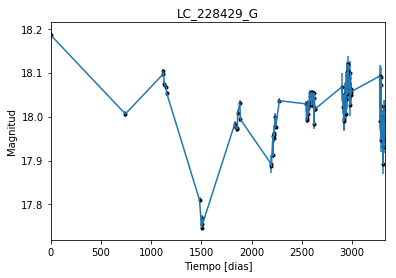

In [2]:
data = np.genfromtxt('LC_228429_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228429_G')
plt.savefig("LC_228429_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

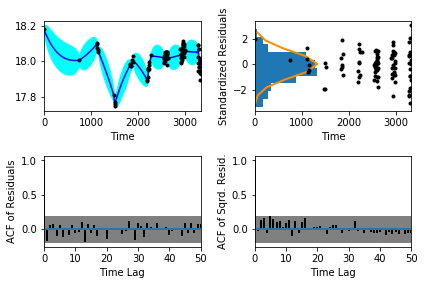

In [5]:
sample.assess_fit()

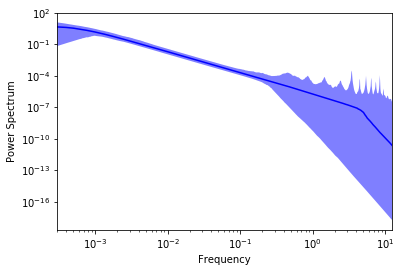

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

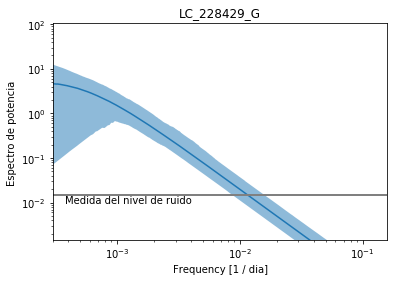

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228429_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228429_G')

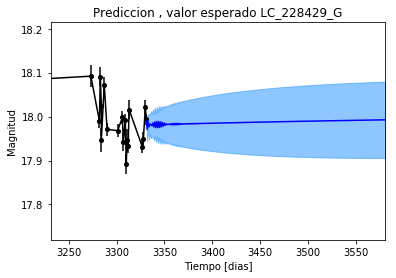

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228429_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228429_G')

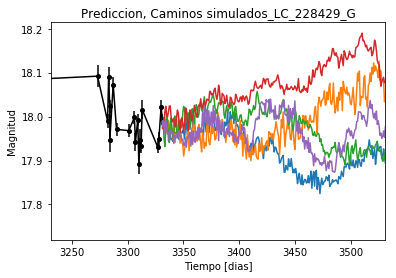

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228429_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


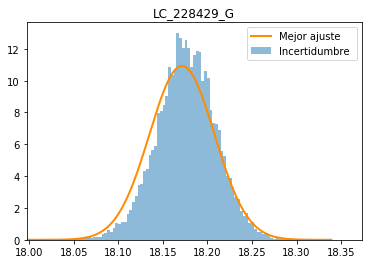

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228429_G')
plt.savefig("Mejor_ajuste_LC_228429_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228429_G')

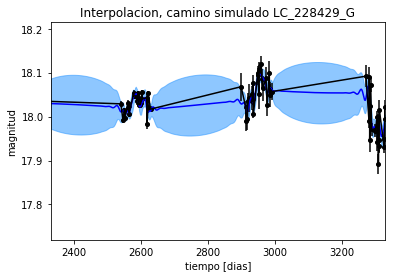

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_G')

Text(0.5,1,'Interpolacion, camino simulado LC_228429_G')

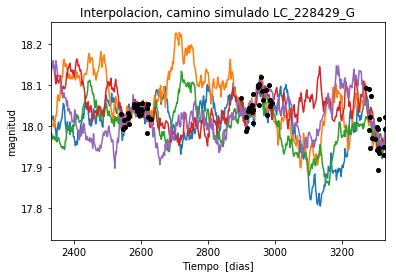

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1176.48220833
Median: 0.0146735070545
Standard deviation: 1.77497961105
68% credibility interval: [ 0.00440577  0.06153719]
95% credibility interval: [  6.14915586e-04   2.62539807e+00]
99% credibility interval: [  3.39796875e-04   1.57005290e+01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 877.514175044
Median: 0.0140396021943
Standard deviation: 0.930063034573
68% credibility interval: [ 0.0040224   0.05263949]
95% credibility interval: [  4.83175473e-04   1.03388206e+00]
99% credibility interval: [  3.27656526e-04   5.87717053e+00]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 137.583227552
Median: 2.90066906587
Stan

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 391.310225277
Median: 262.52652396
Standard deviation: 2.48683045357
68% credibility interval: [ 260.04035238  265.12052957]
95% credibility interval: [ 257.55284875  267.13493312]
99% credibility interval: [ 255.47668209  267.8176613 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 152.301469801
Median: 19.5413509237
Standard deviation: 43.8254732023
68% credibility interval: [  0.65157112  81.1572314 ]
95% credibility interval: [  1.10871037e-01   1.48369905e+02]
99% credibility interval: [  8.31749902e-02   1.81801207e+02]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 210.514122251
Median: 771.594049819
Standard deviation: 4604.85525334
68% credibility interval: [   29.42575089  4768.80258826]
95% credibility 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 240.541864123
Median: 1.89044353208e-35
Standard deviation: 7.45126265382e+40
68% credibility interval: [  3.24343791e-68   8.83593625e+12]
95% credibility interval: [  1.97498092e-194   1.11823096e+035]
99% credibility interval: [  3.94675202e-206   3.22046140e+041]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 393.499855439
Median: 18.0164361307
Standard deviation: 0.0458025983638
68% credibility interval: [ 17.97911913  18.06026682]
95% credibility interval: [ 17.93158899  18.11546226]
99% credibility interval: [ 17.88828524  18.15905703]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 384.493429264
Median: 3.87403323316
Standard deviation: 5.53084983034
68% credibility interval: [  0.56170503  10.44916736]
95% credibility interval: [  0.09833957  20.66025507]
99% credibility interval: [  0.          23.68926586]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 384.493429264
Median: 3.87403323316
Standard deviation: 5.53084983034
68% credibility interval: [  0.56170503  10.44916736]
95% credibility interval: [  0.09833957  20.66025507]
99% credibility interval: [  0.          23.68926586]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 676.284165787
Median: 0.0
Standard deviation: 0.000491022315994


In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 391.310225277
Median: 262.52652396
Standard deviation: 2.48683045357
68% credibility interval: [ 260.04035238  265.12052957]
95% credibility interval: [ 257.55284875  267.13493312]
99% credibility interval: [ 255.47668209  267.8176613 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 519.456763773
Median: 0.0110846245875
Standard deviation: 0.00489398578786
68% credibility interval: [ 0.00762011  0.0163705 ]
95% credibility interval: [ 0.00551861  0.02357126]
99% credibility interval: [ 0.00422907  0.03158109]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 212.820468
Median: 1.55814938758
Standard deviation: 0.258640249537
68% credibility interval: [ 1.26700929  1.836841  ]
95% credibility interval: [ 1.04699773  1.96811125]
99% credibility interval: [ 0.93529603  1.99334387]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 480.425961343
Median: 46.1817112095
Standard deviation: 3122.44300096
68% credibility interval: [  3.58542817e-12   1.19419982e+03]
95% credibility interval: [  8.50839518e-36   1.07817835e+04]
99% credibility interval: [  8.77273821e-42   2.17848809e+04]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1176.48220833
Median: (-0.0921963639296-62.6534423934j)
Standard deviation: 36.4970610318
68% credibility interval: [-0.38664955 -2.42527103j -0.02768228-52.88411681j]
95% credibility interval: [ -1.64958626e+01-35.11417186j  -3.86362857e-03-27.7642162j ]
99% credibility interval: [ -9.86493331e+01 +0.j          -2.13500673e-03-27.76886438j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 877.514175044
Median: (-0.0882134222262+3.42050268427j)
Standard deviation: 35.2392699146
68% credibility interval: [-0.33074368+16.41518553j -0.02527348+97.62472215j]
95% credibility interval: [ -6.49607255e+00 +1.32631447j  -3.03588103e-03+28.07015432j]
99% credibility interval: [ -3.69273515e+01+58.85901954j  -2.05872667e-03 +0.j  